bclc
# British Columbia iGaming Segmentation

## i) Libraries

In [1]:
#Base
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots as sp

#Data processing
from datetime import datetime
import statsmodels.api as sm
from scipy import stats

# Principal Components
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Scaling
from sklearn.preprocessing import StandardScaler

# Segmentation
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

## ii) Data Wrangling

In [2]:
# dfFY221 = pd.read_csv('BC FY22 P1.csv', index_col=0).reset_index()
# dfFY222 = pd.read_csv('BC FY22 P2.csv', index_col=0).reset_index()
# dfFY223 = pd.read_csv('BC FY22 P3.csv', index_col=0).reset_index()
# dfFY224 = pd.read_csv('BC FY22 P4.csv', index_col=0).reset_index()
# dfFY225 = pd.read_csv('BC FY22 P5.csv', index_col=0).reset_index()

# dfFY231 = pd.read_csv('BC FY23 P1.csv', index_col=0).reset_index()
# dfFY232 = pd.read_csv('BC FY23 P2.csv', index_col=0).reset_index()
# dfFY233 = pd.read_csv('BC FY23 P3.csv', index_col=0).reset_index()
# dfFY234 = pd.read_csv('BC FY23 P4.csv', index_col=0).reset_index()
# dfFY235 = pd.read_csv('BC FY23 P5.csv', index_col=0).reset_index()
# dfFY236 = pd.read_csv('BC FY23 P6.csv', index_col=0).reset_index()

dfFY241 = pd.read_csv('BC FY24 P1.csv', index_col=0).reset_index()
dfFY242 = pd.read_csv('BC FY24 P2.csv', index_col=0).reset_index()
dfFY243 = pd.read_csv('BC FY24 P3.csv', index_col=0).reset_index()

#frames=[dfFY221,dfFY222,dfFY223,dfFY224,dfFY225,dfFY231,dfFY232,dfFY233,dfFY234,dfFY235,dfFY236,dfFY241,dfFY242,dfFY243]
frames=[dfFY241,dfFY242,dfFY243]

df = pd.concat(frames)

df.shape

(2711406, 42)

In [3]:
df=df.fillna(0)

In [4]:
df.tail(10)

Date  Week  DayWeek  FiscalYear  FiscalPeriod  FiscalWeek  \
711396  20231008    41        1        2024             7          29   
711397  20231008    41        1        2024             7          29   
711398  20231009    41        2        2024             7          29   
711399  20231008    41        1        2024             7          29   
711400  20231008    41        1        2024             7          29   
711401  20231008    41        1        2024             7          29   
711402  20231009    41        2        2024             7          29   
711403  20231009    41        2        2024             7          29   
711404  20231009    41        2        2024             7          29   
711405  20231009    41        2        2024             7          29   

         Player      Jurisdiction  CasinoID  StartDate  ...  P_PaidAmt  \
711396  7825165  British Columbia         0   20231008  ...        0.0   
711397  7825289  British Columbia         0   20231008  ...        0.0   
711398  7825289  British Columbia         0   20231008  ...        0.0   
711399  7825361  British Columbia         0   20231008  ...        0.0   
711400  7825393  British Columbia         0   20231008  ...        0.0   
711401  7825719  British Columbia         0   20231008  ...        0.0   
711402  7826139  British Columbia         0   20231009  ...        0.0   
711403  7826329  British Columbia         0   20231009  ...        0.0   
711404  7826393  British Columbia         0   20231009  ...        0.0   
711405  7826425  British Columbia         0   20231009  ...        0.0   

        L_PaidAmt  T_PaidAmt  PromoAmt  S_PromoAmt  P_PromoAmt  L_PromoAmt  \
711396      491.0        0.0       0.0         0.0         0.0         0.0   
711397        0.0        0.0      20.0        20.0         0.0         0.0   
711398        0.0        0.0       0.0         0.0         0.0         0.0   
711399        0.0        0.0       0.0         0.0         0.0         0.0   
711400        0.0        0.0       0.0         0.0         0.0         0.0   
711401      120.0        0.0      20.0         0.0         0.0        20.0   
711402        0.0     2566.0      20.0         0.0         0.0         0.0   
711403        3.0        0.0       0.0         0.0         0.0         0.0   
711404      462.5        0.0       0.0         0.0         0.0         0.0   
711405        0.0        0.0      10.0         0.0        10.0         0.0   

        T_PromoAmt  Encore  CRM  
711396         0.0     0.0  0.0  
711397         0.0     0.0  0.0  
711398         0.0     0.0  0.0  
711399         0.0     0.0  0.0  
711400         0.0     0.0  0.0  
711401         0.0     0.0  0.0  
711402        20.0     0.0  0.0  
711403         0.0     0.0  0.0  
711404         0.0     0.0  0.0  
711405         0.0     0.0  0.0  

[10 rows x 42 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711406 entries, 0 to 711405
Data columns (total 42 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalYear       int64  
 4   FiscalPeriod     int64  
 5   FiscalWeek       int64  
 6   Player           int64  
 7   Jurisdiction     object 
 8   CasinoID         int64  
 9   StartDate        int64  
 10  SessionTimeHr    float64
 11  DepositAmt       float64
 12  WithdrawalAmt    float64
 13  ProductCount     int64  
 14  S_ProductC       int64  
 15  P_ProductC       int64  
 16  L_ProductC       int64  
 17  T_ProductC       int64  
 18  NewProductCount  int64  
 19  S_NewProductC    int64  
 20  P_NewProductC    int64  
 21  L_NewProductC    int64  
 22  T_NewProductC    int64  
 23  NetWin           float64
 24  NewNetWin        float64
 25  S_NetWin         float64
 26  P_NetWin         float64
 27  L_NetWin     

In [6]:
df0=df.copy()

## iii) Adding columns (Feature Enginnering):


#### DualChannel and SingleChannel players

In [7]:
# df0['DualChannel'] = np.where(df0['CasinoID']>0,1,0)
# df0['SingleChannel'] = np.where(df0['DualChannel']==1,0,1)

#### NewPlayers

In [8]:
firstdatedf = min(df['Date'])
firstdatedf

20230401

In [9]:
# it generate 3 boolean questions and the three of them have to be TRUE to be a new player
# 1) TRUE to the first player + start_date row. FALSE to the subsequent duplicates
# 2) TRUE to start_date older or equal than date (validating that there's no crazy startdate newer than date)
# 3) TRUE to start_date that is in the universe of the data analyzed

df0['NewPlayer'] = ((~df.duplicated(subset=['Player', 'StartDate'], keep='first') & (df['StartDate'] <= df['Date'])& (df['StartDate'] >= firstdatedf))).astype(int)

In [10]:
df0[df0['FiscalYear']==2024]['NewPlayer'].sum()

3492

#### PlayerLife
Also added Date2 and StartDate2 in date format

In [11]:
date_format='%Y%m%d'
df0['Date2']=pd.to_datetime(df0['Date'],format=date_format).dt.date
df0['StartDate2']=pd.to_datetime(df0['StartDate'],format=date_format).dt.date
df0['PlayerLife'] = (df0['Date2'] - df0['StartDate2']).dt.days
df0['PlayerLifeYears'] = df0['PlayerLife']/365

#### OtherPromo

In [12]:
df0['OtherPromo']=df0['PromoAmt']-df0['CRM']-df0['Encore']

In [13]:
df0.head(1)

Date  Week  DayWeek  FiscalYear  FiscalPeriod  FiscalWeek  Player  \
0  20230425    17        3        2024             2           5     101   

       Jurisdiction  CasinoID  StartDate  ...  L_PromoAmt  T_PromoAmt  Encore  \
0  British Columbia         1   20050402  ...         0.0         0.0     0.0   

   CRM  NewPlayer       Date2  StartDate2  PlayerLife  PlayerLifeYears  \
0  0.0          0  2023-04-25  2005-04-02        6597        18.073973   

   OtherPromo  
0         0.0  

[1 rows x 48 columns]

# 1. Data Exploration

In [14]:
df1=df0.copy()

In [15]:
df1=df1.groupby(['FiscalYear'])['NetWin'].sum().reset_index()
df1

FiscalYear        NetWin
0        2024  1.629094e+08

In [16]:
# Initialize figure
fig1 = go.Figure()


# Add traces
fig1.add_trace(go.Bar(
        x=df1[df1['FiscalYear']==2024]['FiscalYear'],
        y=df1[df1['FiscalYear']==2024]['NetWin'],
        marker_color='#F58518'
        ))
# Add traces
fig1.add_trace(go.Bar(
        x=df1[df1['FiscalYear']==2022]['FiscalYear'],
        y=df1[df1['FiscalYear']==2022]['NetWin'],
        marker_color='#4C78A8'
        ))

# Update xaxis properties
fig1.update_xaxes(title_text='Year',
                 tick0=0,
                 dtick=1,
                # autorange='reversed' 
                )


# Update yaxis properties
fig1.update_yaxes(title_text='NetWin',
                tickformat=",",
                tickprefix="$")


# Update general layout
fig1.update_layout(title_text='BC - Year Over Year Net Win',
                 showlegend=False)

fig1.show()

# 2. Preparing the dataframe for Segmentation

### 2.1 Groupby by player

In [17]:
segmentation_df = df[(df['FiscalYear'] == 2024)].copy()

In [18]:
segmentation_df = segmentation_df.drop(['Jurisdiction','FiscalYear'], axis=1)

In [19]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711406 entries, 0 to 711405
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalPeriod     int64  
 4   FiscalWeek       int64  
 5   Player           int64  
 6   CasinoID         int64  
 7   StartDate        int64  
 8   SessionTimeHr    float64
 9   DepositAmt       float64
 10  WithdrawalAmt    float64
 11  ProductCount     int64  
 12  S_ProductC       int64  
 13  P_ProductC       int64  
 14  L_ProductC       int64  
 15  T_ProductC       int64  
 16  NewProductCount  int64  
 17  S_NewProductC    int64  
 18  P_NewProductC    int64  
 19  L_NewProductC    int64  
 20  T_NewProductC    int64  
 21  NetWin           float64
 22  NewNetWin        float64
 23  S_NetWin         float64
 24  P_NetWin         float64
 25  L_NetWin         float64
 26  T_NetWin         float64
 27  PaidAmt      

In [20]:
# Calculate the 'PlayerLife' column
date_format='%Y%m%d'
segmentation_df['Date2']=pd.to_datetime(segmentation_df['Date'],format=date_format).dt.date
segmentation_df['StartDate2']=pd.to_datetime(segmentation_df['StartDate'],format=date_format).dt.date
segmentation_df['PlayerLife'] = (max(segmentation_df['Date2']) - segmentation_df['StartDate2']).dt.days
segmentation_df['PlayerLifeYears'] = segmentation_df['PlayerLife']/365

In [21]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711406 entries, 0 to 711405
Data columns (total 44 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalPeriod     int64  
 4   FiscalWeek       int64  
 5   Player           int64  
 6   CasinoID         int64  
 7   StartDate        int64  
 8   SessionTimeHr    float64
 9   DepositAmt       float64
 10  WithdrawalAmt    float64
 11  ProductCount     int64  
 12  S_ProductC       int64  
 13  P_ProductC       int64  
 14  L_ProductC       int64  
 15  T_ProductC       int64  
 16  NewProductCount  int64  
 17  S_NewProductC    int64  
 18  P_NewProductC    int64  
 19  L_NewProductC    int64  
 20  T_NewProductC    int64  
 21  NetWin           float64
 22  NewNetWin        float64
 23  S_NetWin         float64
 24  P_NetWin         float64
 25  L_NetWin         float64
 26  T_NetWin         float64
 27  PaidAmt      

In [22]:
# First, let's calculate the sum aggregated columns
agg_columns = ['SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NetWin', 'PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM']
agg_df = segmentation_df.groupby(['Player', 'PlayerLifeYears', 'StartDate'])[agg_columns].sum().reset_index()

# Then, calculate Frequency and Recency
freq_rec_df = segmentation_df.groupby('Player').agg({'Date2': ['count', 'max']}).reset_index()
freq_rec_df.columns = ['Player', 'Frequency', 'MaxDate']

# Calculate Frequency as a %
days_count=segmentation_df.groupby('Date')['Date'].nunique().count()
freq_rec_df['Frequency%'] = freq_rec_df['Frequency']/days_count

# Calculate the Recency column
max_date = segmentation_df['Date2'].max()
freq_rec_df['Recency'] = (max_date - freq_rec_df['MaxDate']).dt.days

# Merge the two DataFrames
sum_all_df = pd.merge(agg_df, freq_rec_df[['Player', 'Frequency', 'Frequency%', 'Recency']], on='Player')
sum_all_df['NewProduct_%']=sum_all_df['NewProductCount']/sum_all_df['ProductCount']
# Now, sum_all_df contains aggregated columns, Frequency, and Recency

In [23]:
# fiscal year beggining date
fiscalyearbeggining = 20230401

# Create a lambda function to apply the condition
condition_lambda = lambda x: 1 if x['StartDate'] >= fiscalyearbeggining else 0

# Group by 'Player' and apply the lambda function to each group
sum_all_df['NewPlayer'] = sum_all_df.apply(condition_lambda , axis=1)

# drop StartDate because we dont need it anymore
sum_all_df=sum_all_df.drop(columns =['StartDate'])

In [24]:
# make Player Index
sum_all_df.index=sum_all_df['Player']

# drop Player column
sum_all_df=sum_all_df.drop(columns =['Player'])

# change withdrawalAmt from negative to positive
sum_all_df['WithdrawalAmt'] = sum_all_df['WithdrawalAmt']*-1

sum_all_df.columns

Index(['PlayerLifeYears', 'SessionTimeHr', 'DepositAmt', 'WithdrawalAmt',
       'ProductCount', 'NewProductCount', 'NetWin', 'PaidAmt', 'S_PaidAmt',
       'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM', 'Frequency',
       'Frequency%', 'Recency', 'NewProduct_%', 'NewPlayer'],
      dtype='object')

In [25]:
sum(sum_all_df['NetWin'])

162909409.58999848

In [26]:
sum(sum_all_df['CRM'])

4424216.409999994

In [27]:
sum_all_df

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101            18.531507           57.0      4000.0        3662.00   
103             2.643836            8.0      1000.0         850.00   
105            12.397260            1.0       100.0         100.00   
125             0.052055            6.0      1500.0          -0.00   
133            14.284932           23.0      5075.0        2521.23   
...                  ...            ...         ...            ...   
7825719         0.002740            1.0        20.0          -0.00   
7826139         0.000000            2.0       250.0          -0.00   
7826329         0.000000            1.0        10.0          -0.00   
7826393         0.000000            1.0       250.0          -0.00   
7826425         0.000000            0.0         0.0          -0.00   

         ProductCount  NewProductCount   NetWin   PaidAmt  S_PaidAmt  \
Player                                                                 
101                51                0   272.00  65156.00       0.00   
103                14                0   149.98   4846.81    4846.81   
105                 7                0    -0.01   1256.80    1256.80   
125                18               11  1482.26  16480.63   14697.13   
133                85               50  2479.07  72512.17   72131.47   
...               ...              ...      ...       ...        ...   
7825719             1                0    20.00    120.00       0.00   
7826139             2                0   446.00   2566.00       0.00   
7826329             1                0     3.00      3.00       0.00   
7826393             2                0   -19.00    462.50       0.00   
7826425             1                1     0.00      0.00       0.00   

         P_PaidAmt  L_PaidAmt  T_PaidAmt  Encore  CRM  Frequency  Frequency%  \
Player                                                                         
101            0.0    65156.0        0.0     0.0  0.0         47    0.244792   
103            0.0        0.0        0.0     0.0  0.0          3    0.015625   
105            0.0        0.0        0.0     0.0  0.0          2    0.010417   
125         1783.5        0.0        0.0     0.0  0.0          5    0.026042   
133          380.7        0.0        0.0   449.0  0.0         24    0.125000   
...            ...        ...        ...     ...  ...        ...         ...   
7825719        0.0      120.0        0.0     0.0  0.0          1    0.005208   
7826139        0.0        0.0     2566.0     0.0  0.0          1    0.005208   
7826329        0.0        3.0        0.0     0.0  0.0          1    0.005208   
7826393        0.0      462.5        0.0     0.0  0.0          1    0.005208   
7826425        0.0        0.0        0.0     0.0  0.0          1    0.005208   

         Recency  NewProduct_%  NewPlayer  
Player                                     
101           24      0.000000          0  
103          142      0.000000          0  
105          139      0.000000          0  
125           14      0.611111          1  
133            1      0.588235          0  
...          ...           ...        ...  
7825719        1      0.000000          1  
7826139        0      0.000000          1  
7826329        0      0.000000          1  
7826393        0      0.000000          1  
7826425        0      1.000000          1  

[87755 rows x 19 columns]

In [28]:
# First, let's calculate the mean aggregated columns
agg_columns = ['SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NetWin', 'PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM']
agg_df = segmentation_df.groupby(['Player', 'PlayerLifeYears', 'StartDate'])[agg_columns].mean().reset_index()

# Then, calculate Frequency and Recency
freq_rec_df = segmentation_df.groupby('Player').agg({'Date2': ['count', 'max']}).reset_index()
freq_rec_df.columns = ['Player', 'Frequency', 'MaxDate']

# Calculate Frequency as a %
days_count=segmentation_df.groupby('Date')['Date'].nunique().count()
freq_rec_df['Frequency%'] = freq_rec_df['Frequency']/days_count

# Calculate the Recency column
max_date = segmentation_df['Date2'].max()
freq_rec_df['Recency'] = (max_date - freq_rec_df['MaxDate']).dt.days

# Merge the two DataFrames
result_all_df = pd.merge(agg_df, freq_rec_df[['Player', 'Frequency', 'Frequency%', 'Recency']], on='Player')
result_all_df['NewProduct_%']=result_all_df['NewProductCount']/result_all_df['ProductCount']
# Now, result_df contains aggregated columns, Frequency, and Recency

In [29]:
# fiscal year beggining date
fiscalyearbeggining = 20230401

# Create a lambda function to apply the condition
condition_lambda = lambda x: 1 if x['StartDate'] >= fiscalyearbeggining else 0

# Group by 'Player' and apply the lambda function to each group
result_all_df['NewPlayer'] = result_all_df.apply(condition_lambda , axis=1)

# drop StartDate because we dont need it anymore
result_all_df=result_all_df.drop(columns =['StartDate'])

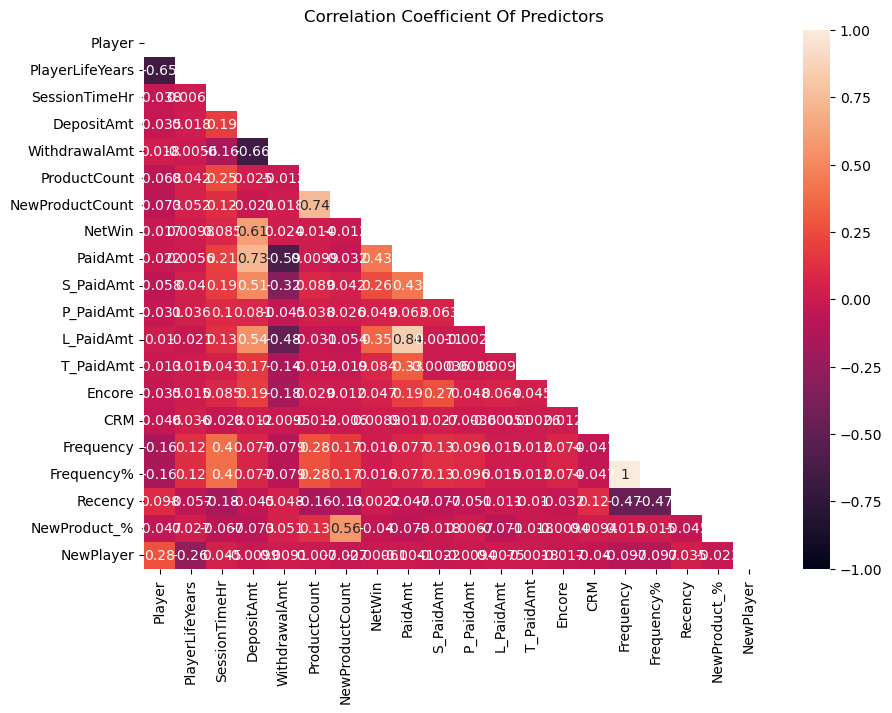

In [30]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(result_all_df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(result_all_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [31]:
result_df = result_all_df.drop(columns=['Frequency%'])

In [32]:
result_all_df.index=result_all_df['Player']
result_all_df=result_all_df.drop(columns =['Player'])
result_all_df['WithdrawalAmt'] = result_all_df['WithdrawalAmt']*-1

In [33]:
result_df.index=result_df['Player']
#result_df = result_df[(result_df['Encore']  == 0)]
result_df=result_df.drop(columns =['Player'])
result_df['WithdrawalAmt'] = result_df['WithdrawalAmt']*-1
result_df['PaidAmt'][result_df['PaidAmt']<0]=0
result_df['S_PaidAmt'][result_df['S_PaidAmt']<0]=0
result_df['P_PaidAmt'][result_df['P_PaidAmt']<0]=0
result_df['L_PaidAmt'][result_df['L_PaidAmt']<0]=0
result_df['T_PaidAmt'][result_df['T_PaidAmt']<0]=0
result_df['CRM'][result_df['CRM']<0]=0
result_df

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_10252\527302250.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_10252\527302250.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_10252\527302250.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_10252\527302250.py:8: SettingWithCopyWarning:



PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101            18.531507       1.212766   85.106383      77.914894   
103             2.643836       2.666667  333.333333     283.333333   
105            12.397260       0.500000   50.000000      50.000000   
125             0.052055       1.200000  300.000000      -0.000000   
133            14.284932       0.958333  211.458333     105.051250   
...                  ...            ...         ...            ...   
7825719         0.002740       1.000000   20.000000      -0.000000   
7826139         0.000000       2.000000  250.000000      -0.000000   
7826329         0.000000       1.000000   10.000000      -0.000000   
7826393         0.000000       1.000000  250.000000      -0.000000   
7826425         0.000000       0.000000    0.000000      -0.000000   

         ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                         
101          1.085106         0.000000    5.787234  1386.297872     0.000000   
103          4.666667         0.000000   49.993333  1615.603333  1615.603333   
105          3.500000         0.000000   -0.005000   628.400000   628.400000   
125          3.600000         2.200000  296.452000  3296.126000  2939.426000   
133          3.541667         2.083333  103.294583  3021.340417  3005.477917   
...               ...              ...         ...          ...          ...   
7825719      1.000000         0.000000   20.000000   120.000000     0.000000   
7826139      2.000000         0.000000  446.000000  2566.000000     0.000000   
7826329      1.000000         0.000000    3.000000     3.000000     0.000000   
7826393      2.000000         0.000000  -19.000000   462.500000     0.000000   
7826425      1.000000         1.000000    0.000000     0.000000     0.000000   

         P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore  CRM  Frequency  \
Player                                                                  
101         0.0000  1386.297872        0.0   0.000000  0.0         47   
103         0.0000     0.000000        0.0   0.000000  0.0          3   
105         0.0000     0.000000        0.0   0.000000  0.0          2   
125       356.7000     0.000000        0.0   0.000000  0.0          5   
133        15.8625     0.000000        0.0  18.708333  0.0         24   
...            ...          ...        ...        ...  ...        ...   
7825719     0.0000   120.000000        0.0   0.000000  0.0          1   
7826139     0.0000     0.000000     2566.0   0.000000  0.0          1   
7826329     0.0000     3.000000        0.0   0.000000  0.0          1   
7826393     0.0000   462.500000        0.0   0.000000  0.0          1   
7826425     0.0000     0.000000        0.0   0.000000  0.0          1   

         Recency  NewProduct_%  NewPlayer  
Player                                     
101           24      0.000000          0  
103          142      0.000000          0  
105          139      0.000000          0  
125           14      0.611111          1  
133            1      0.588235          0  
...          ...           ...        ...  
7825719        1      0.000000          1  
7826139        0      0.000000          1  
7826329        0      0.000000          1  
7826393        0      0.000000          1  
7826425        0      1.000000          1  

[87755 rows x 18 columns]

In [34]:
result_df.isnull().any()

PlayerLifeYears    False
SessionTimeHr      False
DepositAmt         False
WithdrawalAmt      False
ProductCount       False
NewProductCount    False
NetWin             False
PaidAmt            False
S_PaidAmt          False
P_PaidAmt          False
L_PaidAmt          False
T_PaidAmt          False
Encore             False
CRM                False
Frequency          False
Recency            False
NewProduct_%       False
NewPlayer          False
dtype: bool

In [35]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87755 entries, 101 to 7826425
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PlayerLifeYears  87755 non-null  float64
 1   SessionTimeHr    87755 non-null  float64
 2   DepositAmt       87755 non-null  float64
 3   WithdrawalAmt    87755 non-null  float64
 4   ProductCount     87755 non-null  float64
 5   NewProductCount  87755 non-null  float64
 6   NetWin           87755 non-null  float64
 7   PaidAmt          87755 non-null  float64
 8   S_PaidAmt        87755 non-null  float64
 9   P_PaidAmt        87755 non-null  float64
 10  L_PaidAmt        87755 non-null  float64
 11  T_PaidAmt        87755 non-null  float64
 12  Encore           87755 non-null  float64
 13  CRM              87755 non-null  float64
 14  Frequency        87755 non-null  int64  
 15  Recency          87755 non-null  int64  
 16  NewProduct_%     87755 non-null  float64
 17  NewPlaye

PlayerLifeYears


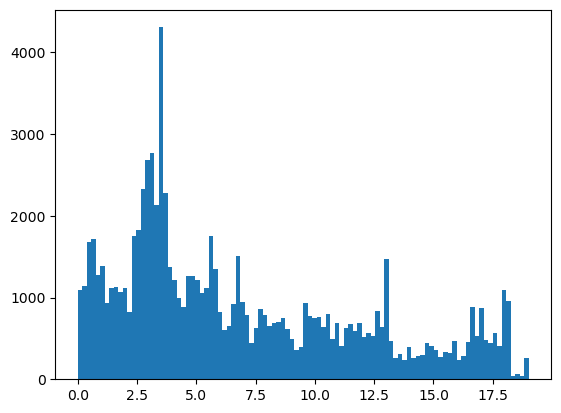

SessionTimeHr


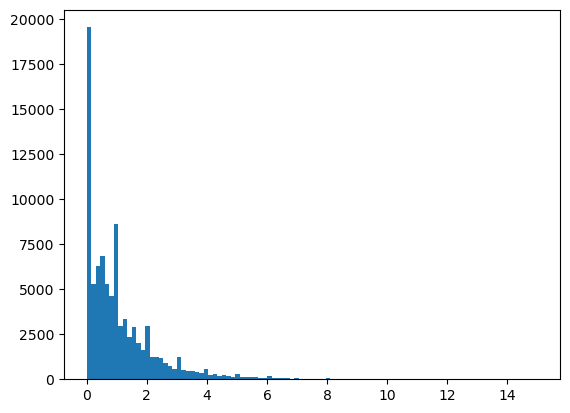

DepositAmt


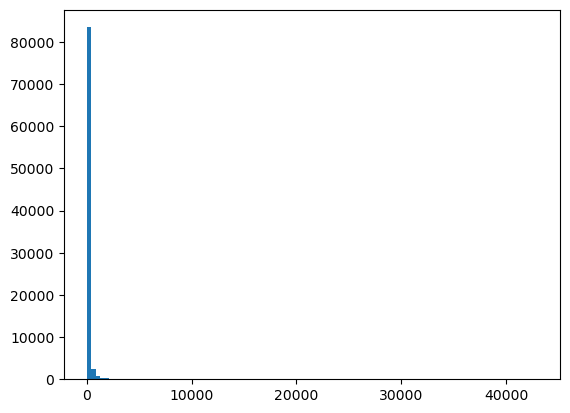

WithdrawalAmt


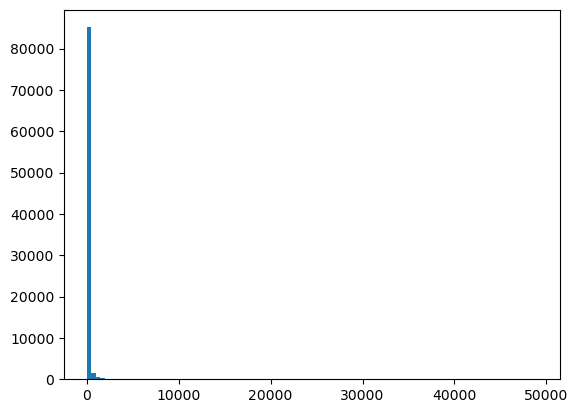

ProductCount


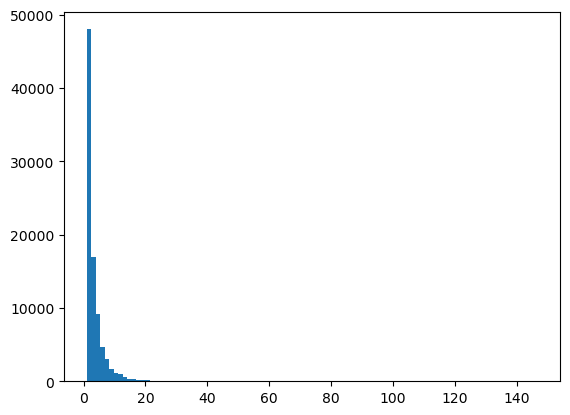

NewProductCount


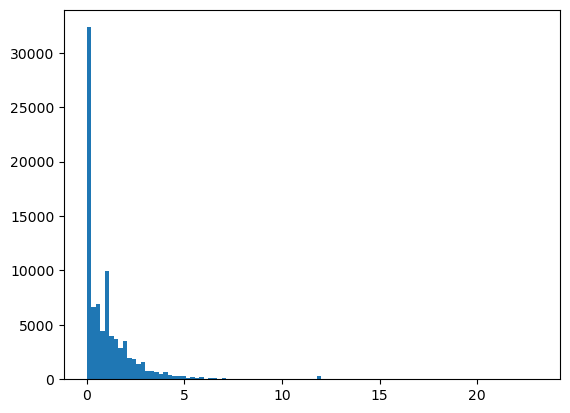

NetWin


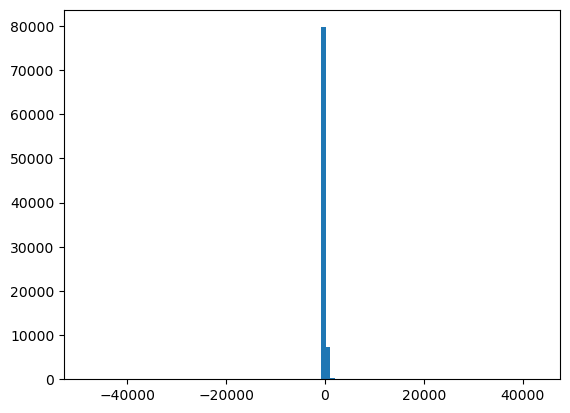

PaidAmt


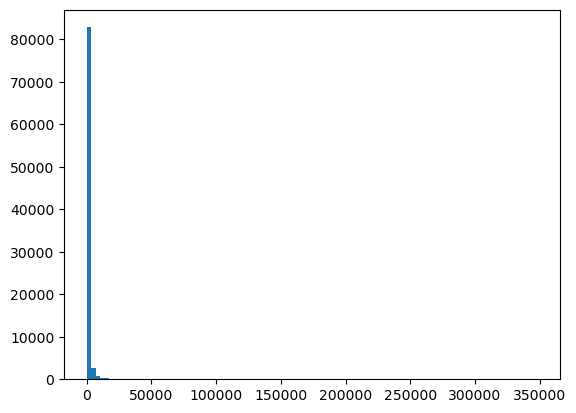

S_PaidAmt


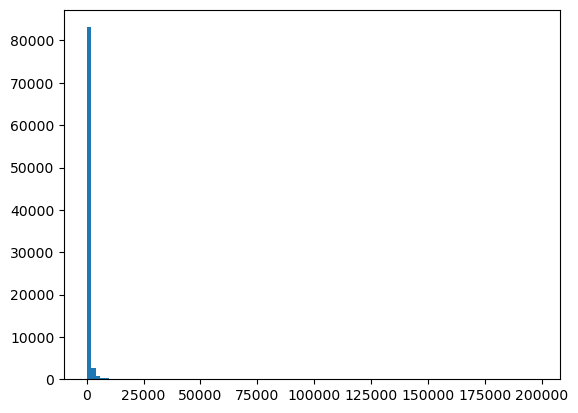

P_PaidAmt


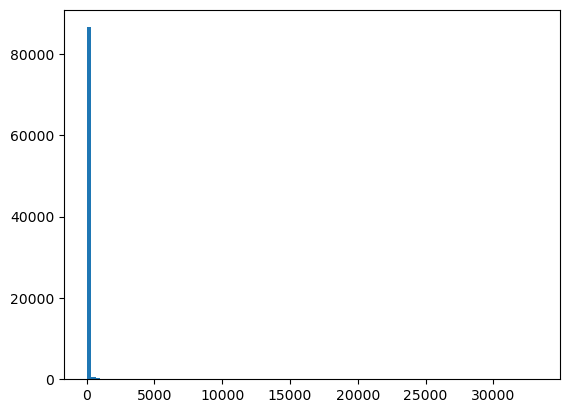

L_PaidAmt


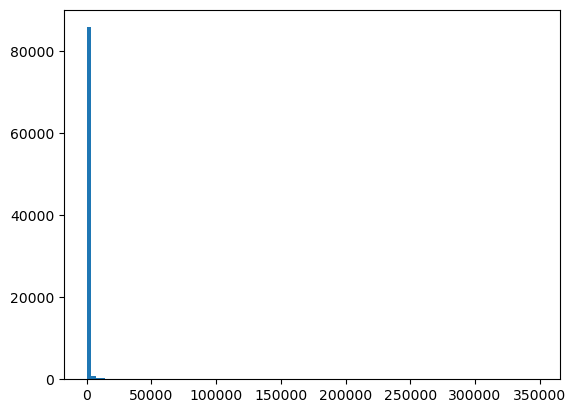

T_PaidAmt


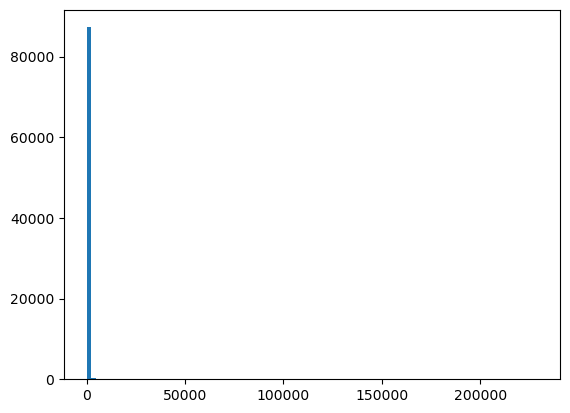

Encore


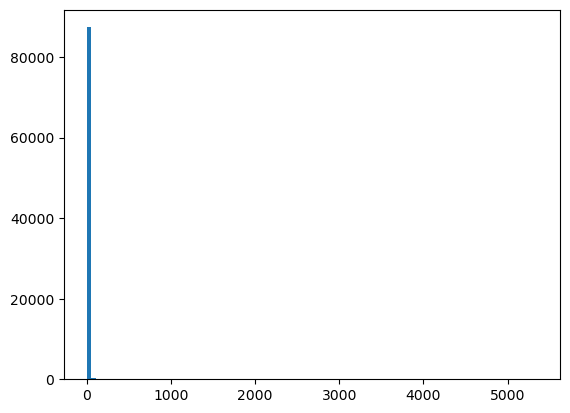

CRM


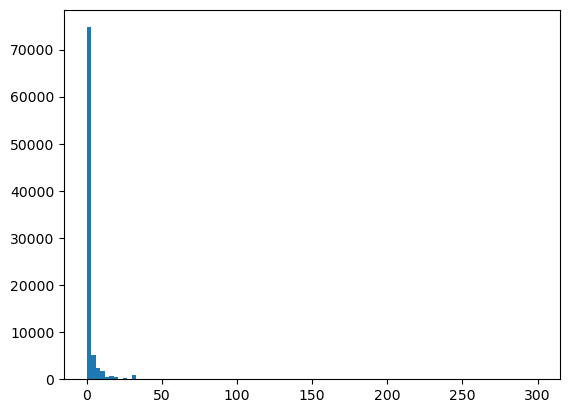

Frequency


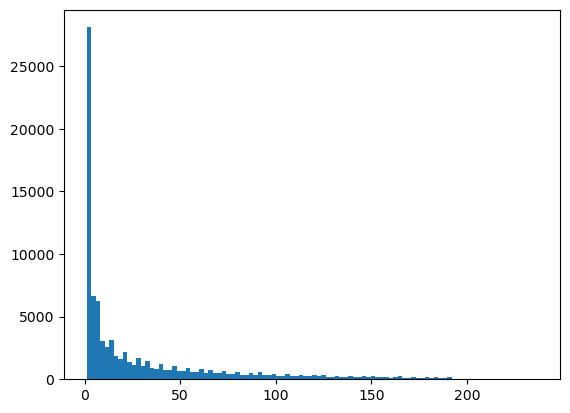

Recency


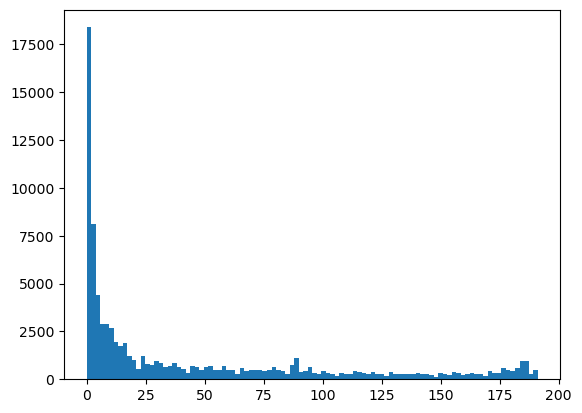

NewProduct_%


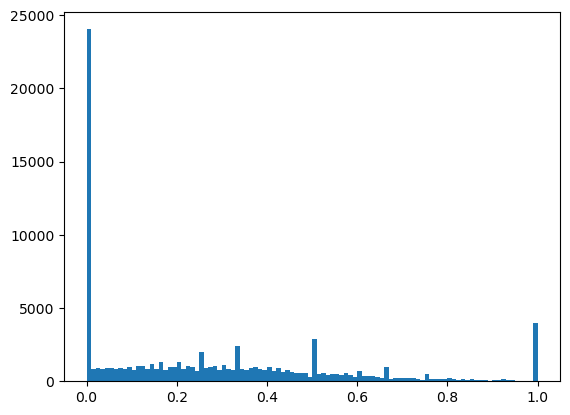

NewPlayer


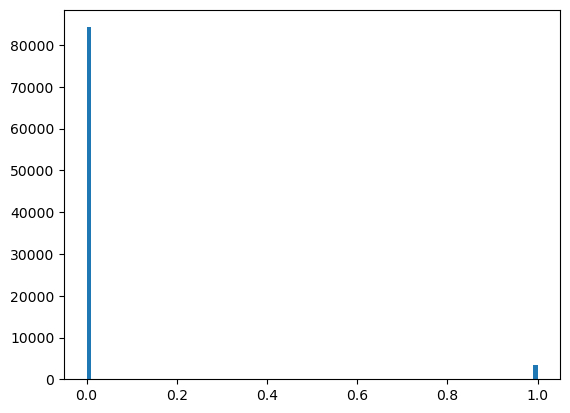

In [36]:
for column in result_df.columns:
    print(column)
    plt.hist(result_df[column],bins=100)
    plt.show()

In [37]:
df_scaled = result_df.copy()

In [38]:
# Extract the columns you want to scale
columns_to_scale = ['PlayerLifeYears','SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NewProduct_%','PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM', 'Recency', 'Frequency']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

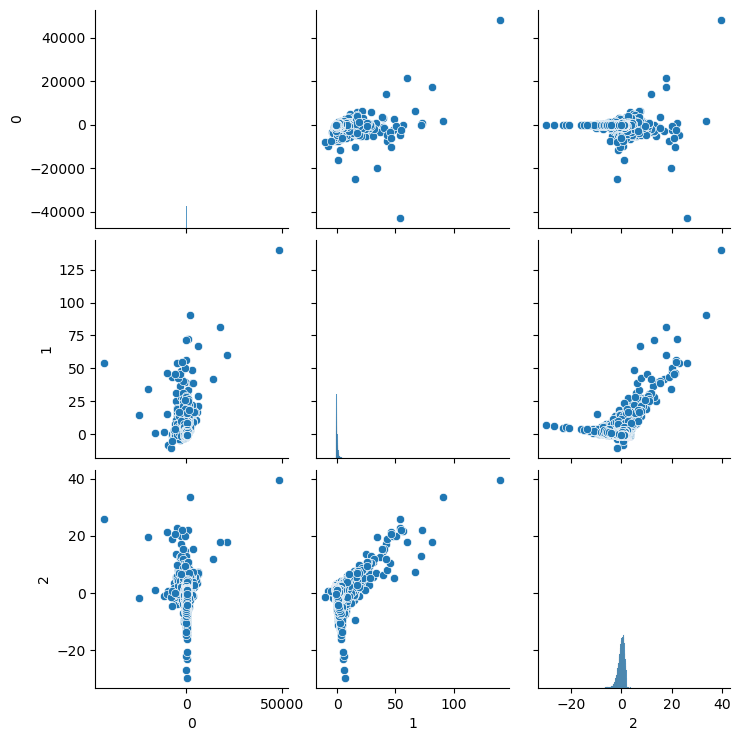

In [39]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transformed)
sns.pairplot(df_pca)

In [40]:
df_transformed = np.log(result_df+1)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

invalid value encountered in log



In [41]:
df_transformed = df_transformed.drop(columns=['NetWin'])
# df_transformed = df_transformed.drop(columns=['Encore'])
# df_transformed = df_transformed.drop(columns=['CRM'])
df_transformed

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101             2.972029       0.794243    4.455584       4.368370   
103             1.293037       1.299283    5.812138       5.650147   
105             2.595050       0.405465    3.931826       3.931826   
125             0.050745       0.788457    5.707110       0.000000   
133             2.726867       0.672094    5.358746       4.663922   
...                  ...            ...         ...            ...   
7825719         0.002736       0.693147    3.044522       0.000000   
7826139         0.000000       1.098612    5.525453       0.000000   
7826329         0.000000       0.693147    2.397895       0.000000   
7826393         0.000000       0.693147    5.525453       0.000000   
7826425         0.000000       0.000000    0.000000       0.000000   

         ProductCount  NewProductCount   PaidAmt  S_PaidAmt  P_PaidAmt  \
Player                                                                   
101          0.734820         0.000000  7.235113   0.000000   0.000000   
103          1.734601         0.000000  7.388083   7.388083   0.000000   
105          1.504077         0.000000  6.444767   6.444767   0.000000   
125          1.526056         1.163151  8.100806   7.986310   5.879695   
133          1.513294         1.126011  8.013787   8.008525   2.825092   
...               ...              ...       ...        ...        ...   
7825719      0.693147         0.000000  4.795791   0.000000   0.000000   
7826139      1.098612         0.000000  7.850493   0.000000   0.000000   
7826329      0.693147         0.000000  1.386294   0.000000   0.000000   
7826393      1.098612         0.000000  6.138806   0.000000   0.000000   
7826425      0.693147         0.693147  0.000000   0.000000   0.000000   

         L_PaidAmt  T_PaidAmt    Encore  CRM  Frequency   Recency  \
Player                                                              
101       7.235113   0.000000  0.000000  0.0   3.871201  3.218876   
103       0.000000   0.000000  0.000000  0.0   1.386294  4.962845   
105       0.000000   0.000000  0.000000  0.0   1.098612  4.941642   
125       0.000000   0.000000  0.000000  0.0   1.791759  2.708050   
133       0.000000   0.000000  2.981042  0.0   3.218876  0.693147   
...            ...        ...       ...  ...        ...       ...   
7825719   4.795791   0.000000  0.000000  0.0   0.693147  0.693147   
7826139   0.000000   7.850493  0.000000  0.0   0.693147  0.000000   
7826329   1.386294   0.000000  0.000000  0.0   0.693147  0.000000   
7826393   6.138806   0.000000  0.000000  0.0   0.693147  0.000000   
7826425   0.000000   0.000000  0.000000  0.0   0.693147  0.000000   

         NewProduct_%  NewPlayer  
Player                            
101          0.000000   0.000000  
103          0.000000   0.000000  
105          0.000000   0.000000  
125          0.476924   0.693147  
133          0.462624   0.000000  
...               ...        ...  
7825719      0.000000   0.693147  
7826139      0.000000   0.693147  
7826329      0.000000   0.693147  
7826393      0.000000   0.693147  
7826425      0.693147   0.693147  

[87755 rows x 17 columns]

PlayerLifeYears


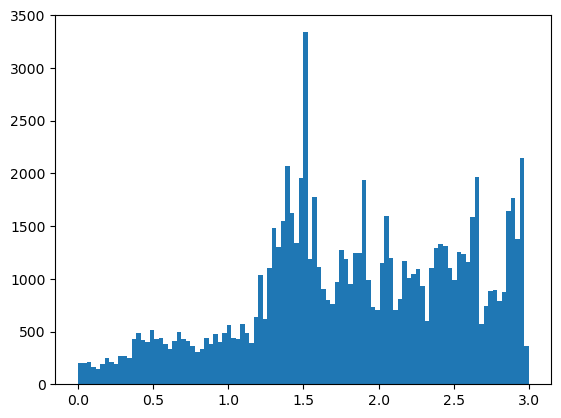

SessionTimeHr


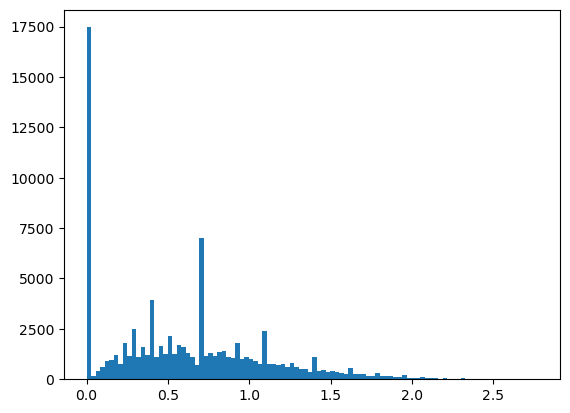

DepositAmt


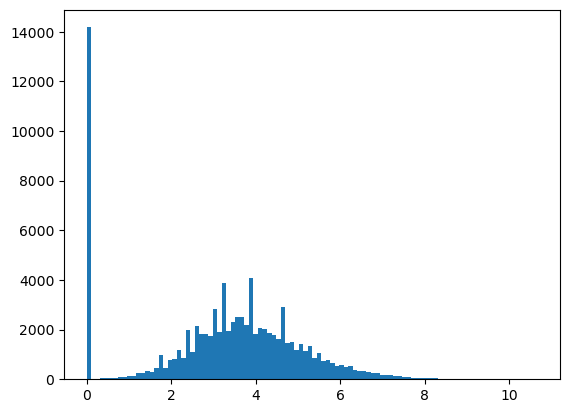

WithdrawalAmt


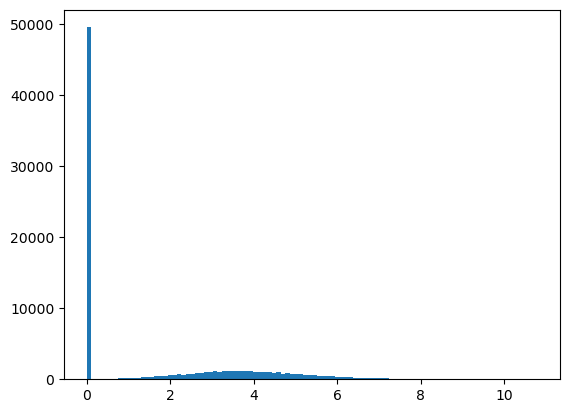

ProductCount


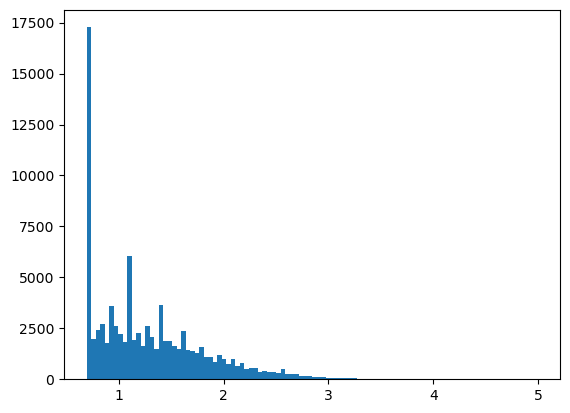

NewProductCount


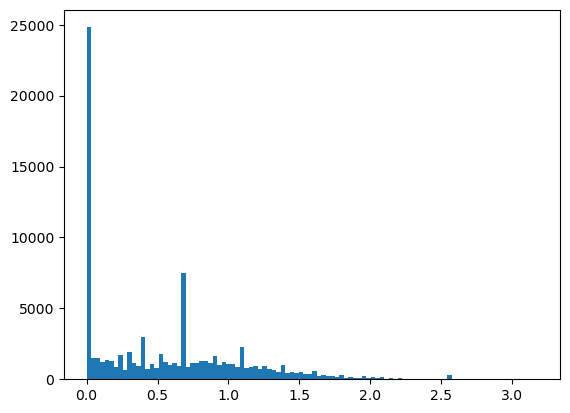

PaidAmt


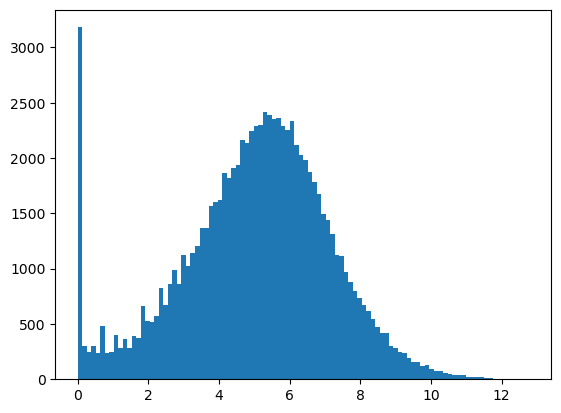

S_PaidAmt


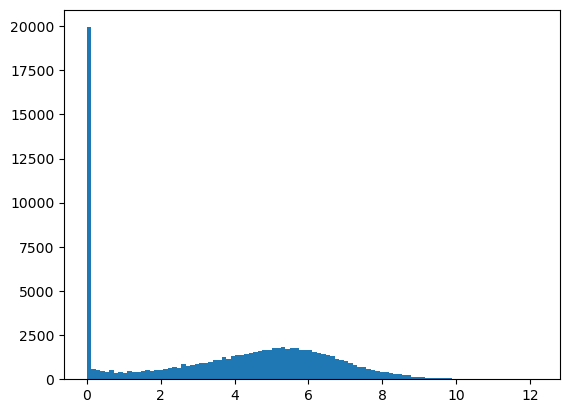

P_PaidAmt


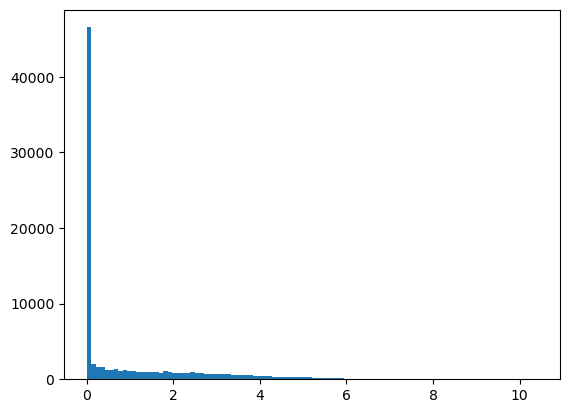

L_PaidAmt


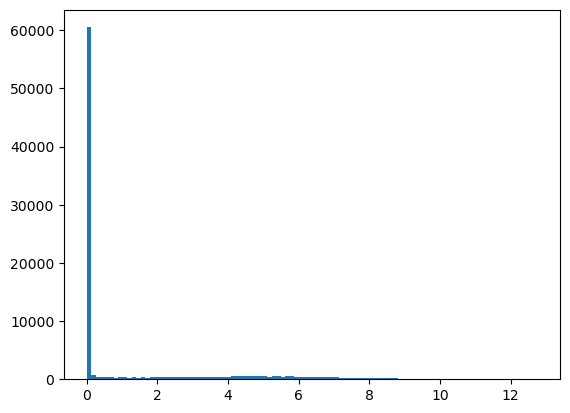

T_PaidAmt


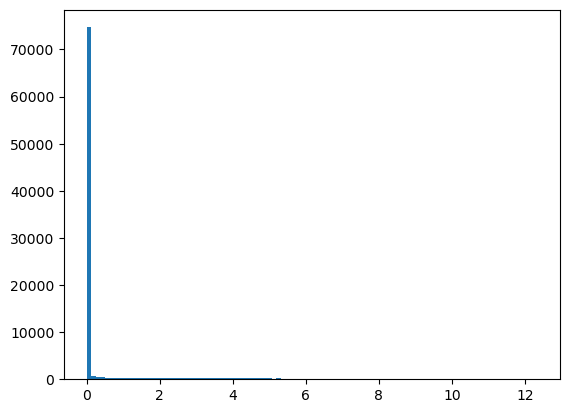

Encore


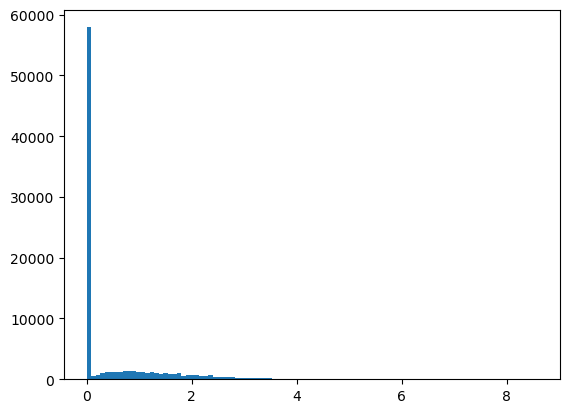

CRM


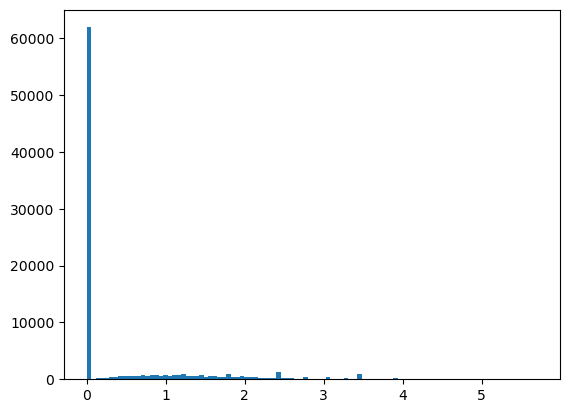

Frequency


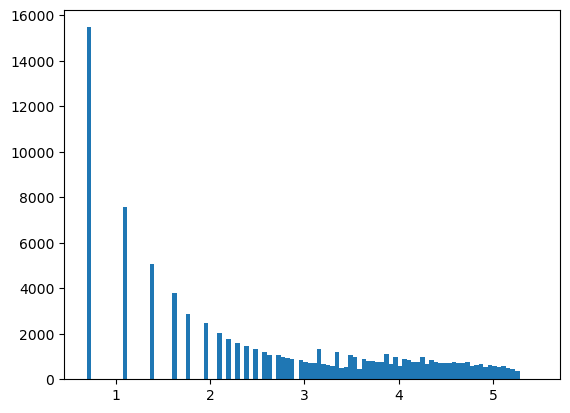

Recency


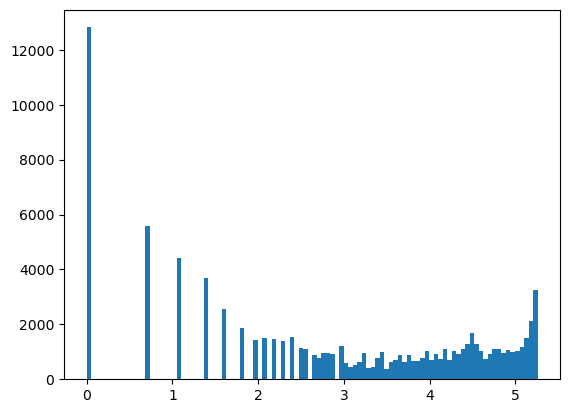

NewProduct_%


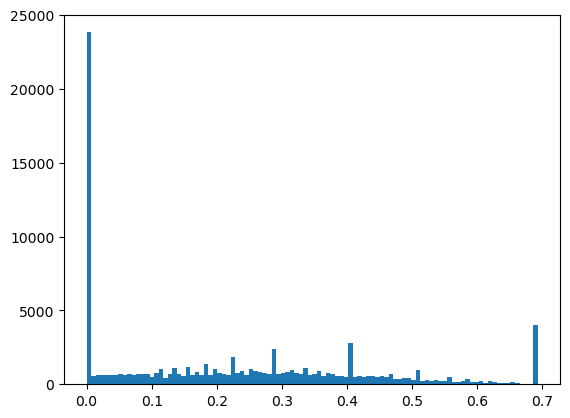

NewPlayer


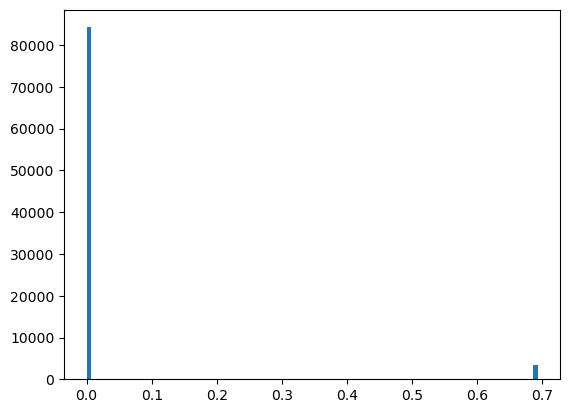

In [42]:
for column in df_transformed.columns:
    print(column)
    plt.hist(df_transformed[column], bins = 100)
    plt.show()

In [43]:
df_scaled = df_transformed.copy()

In [44]:
# Extract the columns you want to scale
columns_to_scale = ['PlayerLifeYears','SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NewProduct_%','PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM', 'Recency', 'Frequency', 'NewPlayer']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [45]:
df_scaled

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101             1.582760       0.369390    0.651416       1.247823   
103            -0.745911       1.383839    1.384461       1.843182   
105             1.059911      -0.411531    0.368392       1.045057   
125            -2.468902       0.357768    1.327707      -0.781194   
133             1.242735       0.124034    1.139460       1.385101   
...                  ...            ...         ...            ...   
7825719        -2.535488       0.166323   -0.111083      -0.781194   
7826139        -2.539283       0.980761    1.229544      -0.781194   
7826329        -2.539283       0.166323   -0.460502      -0.781194   
7826393        -2.539283       0.166323    1.229544      -0.781194   
7826425        -2.539283      -1.225969   -1.756259      -0.781194   

         ProductCount  NewProductCount   PaidAmt  S_PaidAmt  P_PaidAmt  \
Player                                                                   
101         -1.007579        -1.034231  1.040370  -1.389527  -0.661836   
103          0.818608        -1.034231  1.111936   1.374117  -0.661836   
105          0.397536        -1.034231  0.670607   1.021253  -0.661836   
125          0.437683         1.131766  1.445383   1.597895   3.107892   
133          0.414371         1.062605  1.404671   1.606205   1.149453   
...               ...              ...       ...        ...        ...   
7825719     -1.083698        -1.034231 -0.100866  -1.389527  -0.661836   
7826139     -0.343081        -1.034231  1.328275  -1.389527  -0.661836   
7826329     -1.083698        -1.034231 -1.695996  -1.389527  -0.661836   
7826393     -0.343081        -1.034231  0.527463  -1.389527  -0.661836   
7826425     -1.083698         0.256534 -2.344573  -1.389527  -0.661836   

         L_PaidAmt  T_PaidAmt    Encore       CRM  Frequency   Recency  \
Player                                                                   
101       2.374672  -0.329933 -0.560594 -0.525661   0.933207  0.276798   
103      -0.554123  -0.329933 -0.560594 -0.525661  -0.813784  1.269316   
105      -0.554123  -0.329933 -0.560594 -0.525661  -1.016037  1.257250   
125      -0.554123  -0.329933 -0.560594 -0.525661  -0.528726 -0.013920   
133      -0.554123  -0.329933  2.912202 -0.525661   0.474596 -1.160631   
...            ...        ...       ...       ...        ...       ...   
7825719   1.387227  -0.329933 -0.560594 -0.525661  -1.301095 -1.160631   
7826139  -0.554123   5.164275 -0.560594 -0.525661  -1.301095 -1.555112   
7826329   0.007053  -0.329933 -0.560594 -0.525661  -1.301095 -1.555112   
7826393   1.930884  -0.329933 -0.560594 -0.525661  -1.301095 -1.555112   
7826425  -0.554123  -0.329933 -0.560594 -0.525661  -1.301095 -1.555112   

         NewProduct_%  NewPlayer  
Player                            
101         -1.084625  -0.203572  
103         -1.084625  -0.203572  
105         -1.084625  -0.203572  
125          1.240749   4.912260  
133          1.171022  -0.203572  
...               ...        ...  
7825719     -1.084625   4.912260  
7826139     -1.084625   4.912260  
7826329     -1.084625   4.912260  
7826393     -1.084625   4.912260  
7826425      2.295003   4.912260  

[87755 rows x 17 columns]

In [46]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transformed)

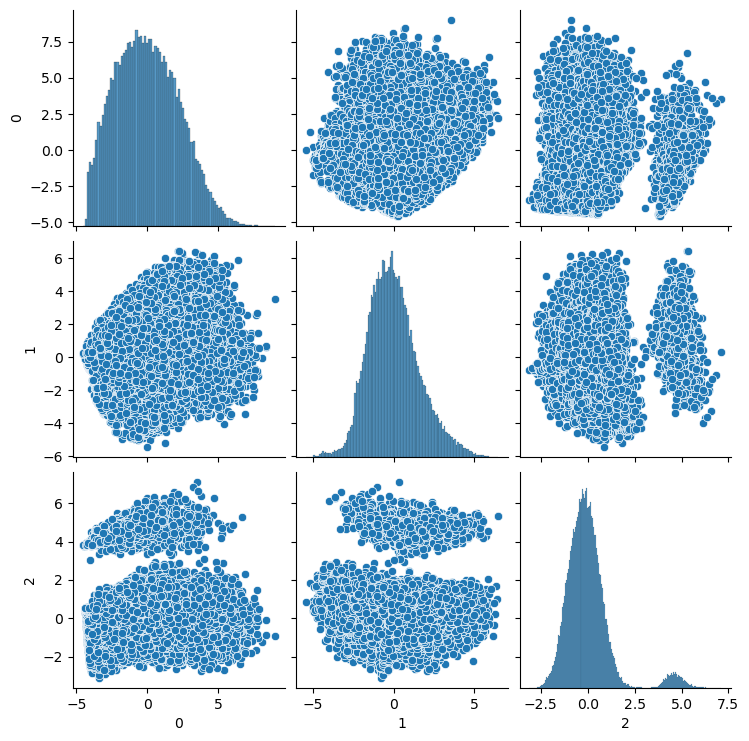

In [47]:
sns.pairplot(df_pca)

In [48]:
clusters = []
inertia = []
sil_score = []

for k in range(2,17): 
    kmeans_model = KMeans(n_clusters=k)
    labels = kmeans_model.fit_predict(df_scaled)
    inertia.append(kmeans_model.inertia_)
    clusters.append(k)
    sil_score.append(silhouette_score(df_scaled, labels))

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\si

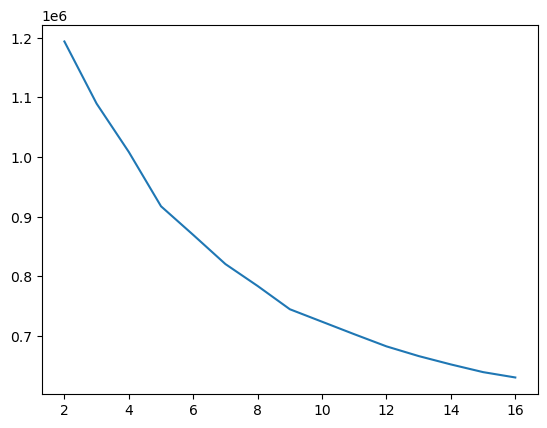

In [49]:
#inertia  plot
plt.plot(clusters, inertia)

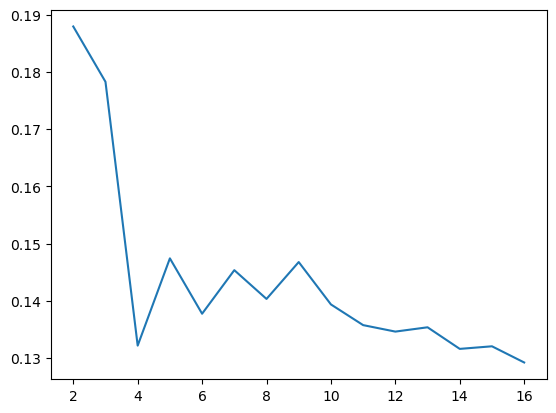

In [50]:
# sil score
plt.plot(clusters, sil_score)

In [71]:
kmeans_model = KMeans(9)
kmeans_labels = kmeans_model.fit_predict(df_scaled)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [72]:
df_kmeans = result_all_df.copy()
df_kmeans['kmeans_labels'] = kmeans_labels

In [73]:
df_kmeans_sum = sum_all_df.copy()
df_kmeans_sum['kmeans_labels'] = kmeans_labels

In [74]:
df_pca_kmeans = df_pca.copy()

In [75]:
len(kmeans_labels)

87755

In [76]:
df_pca_kmeans['kmeans_labels'] = kmeans_labels

In [77]:
df_pca_kmeans.head()

0         1         2  kmeans_labels
0 -0.029597  3.262239 -1.062327              5
1  1.139196  1.627849  0.799211              7
2 -0.295904  0.826826 -0.665656              7
3  1.845842 -1.137132  5.604514              1
4  3.969152 -0.748124 -0.792410              0

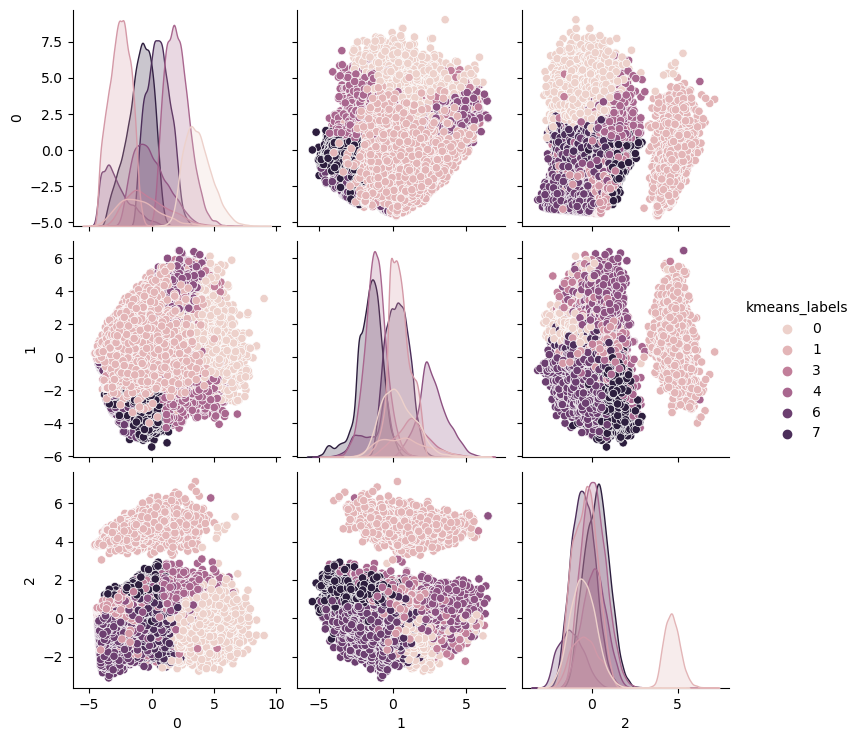

In [78]:
sns.pairplot(df_pca_kmeans, hue = 'kmeans_labels')

In [79]:
df_kmeans.head()

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                              
101           18.531507       1.212766   85.106383      77.914894   
103            2.643836       2.666667  333.333333     283.333333   
105           12.397260       0.500000   50.000000      50.000000   
125            0.052055       1.200000  300.000000      -0.000000   
133           14.284932       0.958333  211.458333     105.051250   

        ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                        
101         1.085106         0.000000    5.787234  1386.297872     0.000000   
103         4.666667         0.000000   49.993333  1615.603333  1615.603333   
105         3.500000         0.000000   -0.005000   628.400000   628.400000   
125         3.600000         2.200000  296.452000  3296.126000  2939.426000   
133         3.541667         2.083333  103.294583  3021.340417  3005.477917   

        P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore  CRM  Frequency  \
Player                                                                 
101        0.0000  1386.297872        0.0   0.000000  0.0         47   
103        0.0000     0.000000        0.0   0.000000  0.0          3   
105        0.0000     0.000000        0.0   0.000000  0.0          2   
125      356.7000     0.000000        0.0   0.000000  0.0          5   
133       15.8625     0.000000        0.0  18.708333  0.0         24   

        Frequency%  Recency  NewProduct_%  NewPlayer  kmeans_labels  
Player                                                               
101       0.244792       24      0.000000          0              5  
103       0.015625      142      0.000000          0              7  
105       0.010417      139      0.000000          0              7  
125       0.026042       14      0.611111          1              1  
133       0.125000        1      0.588235          0              0

In [80]:
temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()

In [81]:
temp_df

kmeans_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0              0         8.032393       2.473154  378.086330     323.665084   
1              1         0.287086       1.390810   83.134930      45.605269   
2              2         6.651634       0.435918   16.031452       1.904810   
3              3         8.167809       1.224995  149.690347     107.330213   
4              4         7.462302       1.456719   74.464428      39.523839   
5              5         5.791835       1.608167  302.353769     249.518319   
6              6         8.000413       0.416758    7.473909       4.421269   
7              7         7.644202       1.060039   93.333435      42.343338   
8              8         6.607668       0.540887   26.898135       4.205754   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
0      4.908806         1.417467  139.342181  3952.889923  3062.512306   
1      3.166308         0.856007   46.870946   789.402194   236.793168   
2      1.429677         0.069683   12.529887    61.244550    22.939795   
3      2.283973         0.426973   72.962874  2079.293785   176.216845   
4      6.904706         2.505649   37.361715   583.667933   523.380112   
5      1.786777         0.153793  131.797817  3685.262655    70.064731   
6      2.059638         0.601313    6.448960    36.592454    28.443927   
7      2.431963         0.435165   52.135628   618.501851   597.544485   
8      3.249511         1.869076   19.706266    99.053457    84.077125   

    P_PaidAmt    L_PaidAmt    T_PaidAmt     Encore        CRM  Frequency  \
0  127.532648   735.984082    26.860887  15.556217   3.466910  86.775347   
1   13.536319   491.895389    47.177318   0.311583   0.417942  10.527602   
2    4.391938    32.319822     1.592995   0.434816   0.112045   4.605161   
3   10.922472   272.735167  1619.419302   1.404883   0.963102  23.044939   
4   37.923385    20.372814     1.991622   1.226045   1.157188  59.065271   
5    1.837614  3612.150892     1.209417   1.041141   0.995758  25.746796   
6    1.368066     5.282927     1.497534   0.425720  25.879144   2.536222   
7   15.258198     5.352162     0.347007   1.119638   0.956782  39.276032   
8    6.728811     7.411610     0.835911   0.600250   0.421926   6.956039   

   Frequency%     Recency  NewProduct_%  NewPlayer  
0    0.451955   11.184601      0.281017   0.001076  
1    0.054831   56.502013      0.245578   1.000000  
2    0.023985   82.470017      0.041221   0.000000  
3    0.120026   46.101228      0.162776   0.000463  
4    0.307632   13.199854      0.421192   0.000066  
5    0.134098   41.957285      0.066694   0.000237  
6    0.013209  119.565108      0.270978   0.000000  
7    0.204563   21.381204      0.179534   0.000000  
8    0.036229   67.387086      0.622393   0.000000

In [82]:
nw_sum = df_kmeans_sum.groupby('kmeans_labels')['NetWin'].sum().reset_index()
nw_sum

kmeans_labels       NetWin
0              0  86712208.19
1              1   1881982.13
2              2    484359.93
3              3   9093986.68
4              4  23318519.27
5              5  22575016.38
6              6     91817.00
7              7  17408082.89
8              8   1343437.12

In [83]:
sum(nw_sum['NetWin'])

162909409.59000003

In [84]:
crm_sum = df_kmeans_sum.groupby('kmeans_labels')['CRM','NetWin'].sum().reset_index()
crm_sum

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_10252\3603334816.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



kmeans_labels         CRM       NetWin
0              0  2283347.47  86712208.19
1              1    34544.35   1881982.13
2              2    11288.90    484359.93
3              3    90461.12   9093986.68
4              4   922233.02  23318519.27
5              5   283371.94  22575016.38
6              6   270492.54     91817.00
7              7   480664.91  17408082.89
8              8    47812.16   1343437.12

In [85]:
sum(crm_sum['CRM'])

4424216.41

In [86]:
# Define a custom aggregation function for weighted average
def weighted_average(df_group):
    return (df_group['NetWin'] * df_group['Frequency%']).sum() / df_group['NetWin'].sum()

# Group by 'kmeans_labels' column and calculate weighted average for 'Frequency%'
FrequencyWA = df_kmeans.groupby('kmeans_labels').apply(weighted_average).reset_index(name='Frequency%WA')
FrequencyWA

kmeans_labels  Frequency%WA
0              0      0.388088
1              1      0.060280
2              2      0.013682
3              3      0.150390
4              4      0.215830
5              5      0.105957
6              6      0.017211
7              7      0.120372
8              8      0.024321

In [89]:
# Define a custom aggregation function for weighted average
def weighted_average(df_group):
    return (df_group['NetWin'] * df_group['Frequency%']).sum() / df_group['NetWin'].sum()

# Group by 'kmeans_labels' column and calculate weighted average for 'Frequency%'
FrequencyWA = df_kmeans.groupby('kmeans_labels').apply(weighted_average).reset_index(name='Frequency%WA')

# PlayerCount: count the occurrences of each segment and store it in a DataFrame
segment_counts = df_kmeans['kmeans_labels'].value_counts().reset_index()
segment_counts.columns = ['kmeans_labels', 'PlayerCount']

# NewPlayerCount: sum the column NewPlayer for each segment
newplayer_counts = df_kmeans.groupby('kmeans_labels')['NewPlayer'].sum().reset_index()
newplayer_counts = newplayer_counts.rename(columns={'NewPlayer':'NewPlayerCount'})

# for CRM sum graph
crm_sum = df_kmeans_sum.groupby('kmeans_labels')['CRM'].sum().reset_index()
crm_sum = crm_sum.rename(columns={'CRM':'CRM_sum'})
nw_sum = df_kmeans_sum.groupby('kmeans_labels')['NetWin'].sum().reset_index()
nw_sum = nw_sum.rename(columns={'NetWin':'NetWin_sum'})

# Merge ALL new metrics with temp_df
temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()
temp_df = pd.merge(temp_df,crm_sum,on='kmeans_labels',how='left')
temp_df = pd.merge(temp_df,nw_sum,on='kmeans_labels',how='left')
temp_df = temp_df.merge(segment_counts, on='kmeans_labels', how='left')
temp_df = temp_df.merge(newplayer_counts, on='kmeans_labels', how='left')
temp_df = temp_df.merge(FrequencyWA, on='kmeans_labels', how='left')

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='PaidAmt', ascending=False)

# Reorganize the "kmeans_labels" based on the new order
temp_df['kmeans_labels'] = range(len(temp_df))
temp_df

kmeans_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0              0         8.032393       2.473154  378.086330     323.665084   
5              1         5.791835       1.608167  302.353769     249.518319   
3              2         8.167809       1.224995  149.690347     107.330213   
1              3         0.287086       1.390810   83.134930      45.605269   
7              4         7.644202       1.060039   93.333435      42.343338   
4              5         7.462302       1.456719   74.464428      39.523839   
8              6         6.607668       0.540887   26.898135       4.205754   
2              7         6.651634       0.435918   16.031452       1.904810   
6              8         8.000413       0.416758    7.473909       4.421269   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  ...  \
0      4.908806         1.417467  139.342181  3952.889923  3062.512306  ...   
5      1.786777         0.153793  131.797817  3685.262655    70.064731  ...   
3      2.283973         0.426973   72.962874  2079.293785   176.216845  ...   
1      3.166308         0.856007   46.870946   789.402194   236.793168  ...   
7      2.431963         0.435165   52.135628   618.501851   597.544485  ...   
4      6.904706         2.505649   37.361715   583.667933   523.380112  ...   
8      3.249511         1.869076   19.706266    99.053457    84.077125  ...   
2      1.429677         0.069683   12.529887    61.244550    22.939795  ...   
6      2.059638         0.601313    6.448960    36.592454    28.443927  ...   

   Frequency  Frequency%     Recency  NewProduct_%  NewPlayer     CRM_sum  \
0  86.775347    0.451955   11.184601      0.281017   0.001076  2283347.47   
5  25.746796    0.134098   41.957285      0.066694   0.000237   283371.94   
3  23.044939    0.120026   46.101228      0.162776   0.000463    90461.12   
1  10.527602    0.054831   56.502013      0.245578   1.000000    34544.35   
7  39.276032    0.204563   21.381204      0.179534   0.000000   480664.91   
4  59.065271    0.307632   13.199854      0.421192   0.000066   922233.02   
8   6.956039    0.036229   67.387086      0.622393   0.000000    47812.16   
2   4.605161    0.023985   82.470017      0.041221   0.000000    11288.90   
6   2.536222    0.013209  119.565108      0.270978   0.000000   270492.54   

    NetWin_sum  PlayerCount  NewPlayerCount  Frequency%WA  
0  86712208.19         8364               9      0.388088  
5  22575016.38         8428               2      0.105957  
3   9093986.68         4317               2      0.150390  
1   1881982.13         3478            3478      0.060280  
7  17408082.89        14386               0      0.120372  
4  23318519.27        15091               1      0.215830  
8   1343437.12        14604               0      0.024321  
2    484359.93        14725               0      0.013682  
6     91817.00         4362               0      0.017211  

[9 rows x 25 columns]

In [95]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='kmeans_labels', y=metric,
                 labels={'kmeans_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['kmeans_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['kmeans_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['kmeans_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'Frequency%WA':
        fig.update_yaxes(title=f'Weighted Average per day', tickfont=dict(size=20), tickformat='.0%')
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

In [69]:
# Make a copy of the desired df
df_to_csv=df_kmeans.copy()
df_to_csv = df_to_csv.reset_index()

# Specify the path where you want to save the CSV file
csv_file_path = 'segments_average.csv'

# Export the DataFrame to a CSV file
df_to_csv.to_csv(csv_file_path, index=False)

In [70]:
# Make a copy of the desired df
df_to_csv=df_kmeans_sum.copy()
df_to_csv = df_to_csv.reset_index()

# Specify the path where you want to save the CSV file
csv_file_path = 'segments_sum.csv'

# Export the DataFrame to a CSV file
df_to_csv.to_csv(csv_file_path, index=False)